# Stretch Goals - Year over Year All-NBA Trend Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [73]:
full_df = pd.read_csv('../Data/Final_NBA_PLayers_updated.csv')
all_nba1 = pd.read_csv('../Data/All_NBA_1.csv')
all_nba2 = pd.read_csv('../Data/All_NBA_2.csv')
all_nba3 = pd.read_csv('../Data/All_NBA_3.csv')

In [74]:
print(all_nba1.head())
print(all_nba2.head())
print(all_nba3.head())

   YEAR                 PLAYER POS                TEAM    FG%   PPG   RPG  \
0  2020           LeBron James   F  Los Angeles Lakers  0.493  25.3   7.8   
1  2020           James Harden   G     Houston Rockets  0.444  34.3   6.6   
2  2020          Anthony Davis   F  Los Angeles Lakers  0.503  26.1   9.3   
3  2020  Giannis Antetokounmpo   F     Milwaukee Bucks  0.553  29.5  13.6   
4  2020            Luka Doncic   G    Dallas Mavericks  0.463  28.8   9.4   

    APG  BLKPG  
0  10.2    0.5  
1   7.5    0.9  
2   3.2    2.3  
3   5.6    1.0  
4   8.8    0.2  
   YEAR          PLAYER POS                    TEAM    FG%   PPG  RPG  APG  \
0  2020      Chris Paul   G   Oklahoma City Thunder  0.489  17.6  5.0  6.7   
1  2020   Kawhi Leonard   F             LA Clippers   0.47  27.1  7.1  4.9   
2  2020  Damian Lillard   G  Portland Trail Blazers  0.463  30.0  4.3  8.0   
3  2020    Nikola Jokic   C          Denver Nuggets  0.528  19.9  9.7  7.0   
4  2020   Pascal Siakam   F         Toronto R

In [75]:
all_nba1['award_year'] = [str(x)[2:] for x in all_nba1['YEAR']]
all_nba1['concat'] = all_nba1['PLAYER'] + all_nba1['award_year']

all_nba2['award_year'] = [str(x)[2:] for x in all_nba2['YEAR']]
all_nba2['concat'] = all_nba2['PLAYER'] + all_nba2['award_year']

all_nba3['award_year'] = [str(x)[2:] for x in all_nba3['YEAR']]
all_nba3['concat'] = all_nba3['PLAYER'] + all_nba3['award_year']

In [76]:
all_nba1 = all_nba1[['YEAR','PLAYER', 'POS','TEAM','concat' ]]
all_nba1['All_NBA'] = 'First'

all_nba2 = all_nba2[['YEAR','PLAYER', 'POS','TEAM','concat' ]]
all_nba2['All_NBA'] = 'Second'

all_nba3 = all_nba3[['YEAR','PLAYER', 'POS','TEAM','concat' ]]
all_nba3['All_NBA'] = 'Third'

In [77]:
full_df = full_df[['concat','Age', 'WS', 'G',
       'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%',
       '3P%', 'eFG%', 'FT%', 'TS%','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP','season_count']]

In [81]:
all_nba_total1 = all_nba1.merge(full_df,  how = 'left', on ='concat')
all_nba_total2 = all_nba2.merge(full_df,  how = 'left', on ='concat')
all_nba_total3 = all_nba3.merge(full_df,  how = 'left', on ='concat')

In [82]:
all_nba_total.columns

Index(['YEAR', 'PLAYER', 'POS', 'TEAM', 'concat', 'All_NBA', 'Age', 'WS', 'G',
       'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%',
       '3P%', 'eFG%', 'FT%', 'TS%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'season_count'],
      dtype='object')

In [92]:
all_nba_total = pd.concat([all_nba_total1,all_nba_total2,all_nba_total3])
all_nba_total = all_nba_total.reset_index(drop=True)
all_nba_total

,YEAR,PLAYER,POS,TEAM,concat,All_NBA,Age,WS,G,GS,...,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,season_count
0,2020,LeBron James,F,Los Angeles Lakers,LeBron James20,First,35.0,9.8,67.0,67.0,...,116.0,106.0,6.2,3.6,0.204,6.6,1.8,8.4,6.1,17.0
1,2020,James Harden,G,Houston Rockets,James Harden20,First,30.0,13.1,68.0,68.0,...,120.0,108.0,9.9,3.2,0.254,8.1,1.6,9.6,7.3,11.0
2,2020,Anthony Davis,F,Los Angeles Lakers,Anthony Davis20,First,26.0,11.1,62.0,62.0,...,121.0,102.0,6.7,4.4,0.250,5.4,2.6,8.0,5.4,8.0
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks,Giannis Antetokounmpo20,First,25.0,11.1,63.0,63.0,...,116.0,97.0,6.1,5.0,0.279,7.4,4.1,11.5,6.6,7.0
4,2020,Luka Doncic,G,Dallas Mavericks,Luka Doncic20,First,20.0,8.8,61.0,61.0,...,116.0,110.0,6.5,2.3,0.207,7.4,1.0,8.4,5.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1989,Terry Cummings,F,Milwaukee Bucks,Terry Cummings89,Third,27.0,7.7,80.0,78.0,...,108.0,106.0,4.2,3.5,0.131,2.0,-0.8,1.2,2.3,7.0
896,1989,Dale Ellis,G,Seattle SuperSonics,Dale Ellis89,Third,28.0,10.8,82.0,82.0,...,119.0,112.0,9.2,1.6,0.163,4.3,-1.6,2.7,3.8,6.0
897,1989,Dominique Wilkins,F,Atlanta Hawks,Dominique Wilkins89,Third,29.0,10.4,80.0,80.0,...,114.0,108.0,7.5,2.9,0.166,4.5,-1.1,3.4,4.1,7.0
898,1989,Robert Parish,C,Boston Celtics,Robert Parish89,Third,35.0,10.5,80.0,80.0,...,118.0,106.0,6.9,3.6,0.177,3.5,-0.2,3.3,3.8,13.0


In [93]:
all_nba_total.to_csv('../Data/YoY_Analysis.csv')

In [110]:
all_nba_total.sort_values(by=['YEAR', 'All_NBA'], inplace = True)
grouped = all_nba_total.groupby(['YEAR','All_NBA'], sort = False).mean()
grouped.head()

Age     WS     G  GS  MP     FG     FGA     2P     2PA  3P  \
YEAR All_NBA                                                                
1947 First    24.8  12.38  58.8 NaN NaN  356.2  1125.2  356.2  1125.2 NaN   
     Second   25.6   6.88  56.8 NaN NaN  287.8   981.0  287.8   981.0 NaN   
1948 First    26.2   8.44  46.8 NaN NaN  303.0  1001.8  303.0  1001.8 NaN   
     Second   25.2   6.76  47.2 NaN NaN  227.8   733.0  227.8   733.0 NaN   
1949 First    25.8  10.92  58.2 NaN NaN  433.6  1194.2  433.6  1194.2 NaN   

              ...  ORtg  DRtg   OWS   DWS  WS/48  OBPM  DBPM  BPM  VORP  \
YEAR All_NBA  ...                                                         
1947 First    ...   NaN   NaN  8.32  4.08    NaN   NaN   NaN  NaN   NaN   
     Second   ...   NaN   NaN  4.32  2.56    NaN   NaN   NaN  NaN   NaN   
1948 First    ...   NaN   NaN  5.76  2.72    NaN   NaN   NaN  NaN   NaN   
     Second   ...   NaN   NaN  4.42  2.32    NaN   NaN   NaN  NaN   NaN   
1949 First    ...   NaN   NaN  8.18  2.70    NaN   NaN   NaN  NaN   NaN   

              season_count  
YEAR All_NBA                
1947 First             1.0  
     Second            1.0  
1948 First             2.0  
     Second            1.6  
1949 First             1.8  

[5 rows x 46 columns]

In [121]:
all_nba_total
all_nba_total['PPG'] = all_nba_total['PTS'] / all_nba_total['G']

<AxesSubplot:xlabel='YEAR', ylabel='PPG'>

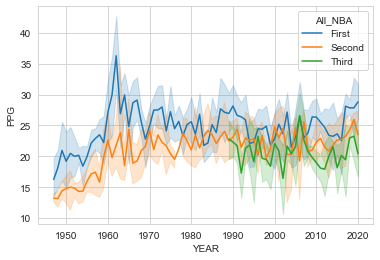

In [123]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.PPG, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='Age'>

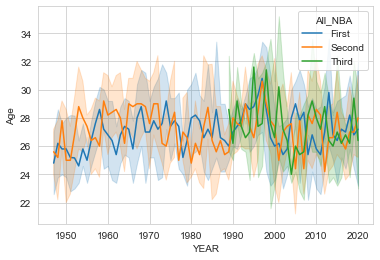

In [124]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.Age, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='season_count'>

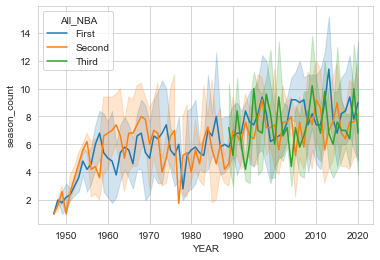

In [127]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.season_count, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='VORP'>

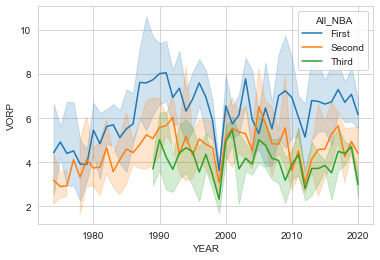

In [128]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.VORP, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='WS'>

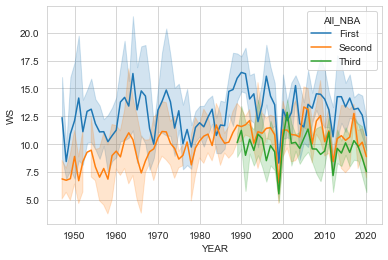

In [126]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.WS, hue = all_nba_total['All_NBA'])

In [120]:
#1999 was a shortened lockout season, games didn't start until Feb
all_nba_total[all_nba_total['YEAR'] == 1999]

,YEAR,PLAYER,POS,TEAM,concat,All_NBA,Age,WS,G,GS,...,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,season_count
105,1999,Tim Duncan,F,San Antonio Spurs,Tim Duncan99,First,22.0,8.7,50.0,50.0,...,106.0,91.0,4.0,4.7,0.213,2.7,1.8,4.5,3.2,2.0
106,1999,Allen Iverson,G,Philadelphia 76ers,Allen Iverson99,First,23.0,7.2,48.0,48.0,...,105.0,99.0,4.3,2.9,0.173,5.1,0.6,5.7,3.9,3.0
107,1999,Jason Kidd,G,Phoenix Suns,Jason Kidd99,First,25.0,8.1,50.0,50.0,...,113.0,102.0,5.8,2.3,0.188,4.4,1.1,5.5,3.9,5.0
108,1999,Karl Malone,F,Utah Jazz,Karl Malone99,First,35.0,9.6,49.0,49.0,...,112.0,96.0,6.2,3.4,0.252,5.3,1.4,6.7,4.0,14.0
109,1999,Alonzo Mourning,C,Miami Heat,Alonzo Mourning99,First,28.0,7.9,46.0,46.0,...,107.0,93.0,4.0,3.9,0.216,2.7,2.3,4.9,3.1,7.0
476,1999,Tim Hardaway,G,Miami Heat,Tim Hardaway99,Second,32.0,5.4,48.0,48.0,...,105.0,102.0,3.4,1.9,0.146,4.2,-0.8,3.3,2.4,9.0
477,1999,Grant Hill,F,Detroit Pistons,Grant Hill99,Second,26.0,7.3,50.0,50.0,...,107.0,98.0,4.5,2.8,0.189,4.8,1.4,6.2,3.8,5.0
478,1999,Shaquille O'Neal,C,Los Angeles Lakers,Shaquille O'Neal99,Second,26.0,9.0,49.0,49.0,...,115.0,102.0,7.2,1.9,0.255,7.5,-0.4,7.1,3.9,7.0
479,1999,Gary Payton,G,Seattle SuperSonics,Gary Payton99,Second,30.0,7.2,50.0,50.0,...,111.0,106.0,6.0,1.2,0.172,5.1,0.0,5.1,3.6,9.0
480,1999,Chris Webber,F,Sacramento Kings,Chris Webber99,Second,25.0,3.6,42.0,42.0,...,98.0,98.0,1.0,2.7,0.102,0.8,1.1,1.9,1.7,6.0
